For this project you will assemble a dataset for investigating colleges and universities. Fortunately, there is a large collection of higher education data from the government that is accessible through an API. This service provides tons of data, from cost statistics to admission rates to instructional expenditures!

The data spans a number of years and categories, so simply deciding what data you want to look at and how you want to analyze will take some time.

The main data documentation is available at https://collegescorecard.ed.gov/data/documentation/. This page includes a detailed data dictionary as well as a couple of reports describing the data. That page also links to the specific API documentation.

To use the API you will need to signup for a (free) API key on https://api.data.gov/docs/. This page also includes links describing API key usage and rate limits.

In [1]:
import requests
import json
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression
from sklearn.metrics import confusion_matrix, classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.
//anaconda/envs/py36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
# left_half = 'https://api.data.gov/ed/collegescorecard/v1/schools?fields=2015.aid.median_debt.completers.overall,
# 2015.repayment.3_yr_repayment.completers,2015.repayment.5_yr_repayment.completers,2015.student.demographics.median_family_income,2015.repayment.3_yr_default_rate_denom,2015.aid.median_debt.number.completers,2015.aid.median_debt.number.noncompleters,2015.aid.median_debt.number.pell_grant,2015.aid.median_debt.number.no_pell_grant,2015.repayment.3_yr_repayment.female_students,2015.repayment.3_yr_repayment.male_students&page='

In [3]:
left_half = 'https://api.data.gov/ed/collegescorecard/v1/schools?school.degrees_awarded.predominant=3&fields=school.name,2013.cost.avg_net_price.public,2013.cost.avg_net_price.private,2013.cost.attendance.academic_year,2013.cost.tuition.program_year,2013.cost.tuition.in_state,2013.cost.tuition.out_of_state,school.ownership,2013.student.demographics.median_family_income,2013.repayment.3_yr_default_rate_denom,2013.repayment.3_yr_repayment.female_students,school.city,school.state,id,2013.admissions.admission_rate.overall,2013.admissions.admission_rate.by_ope_id,2013.admissions.sat_scores.25th_percentile.critical_reading,2013.admissions.sat_scores.75th_percentile.critical_reading,2013.admissions.sat_scores.25th_percentile.math,2013.admissions.sat_scores.75th_percentile.math,2013.admissions.sat_scores.25th_percentile.writing,2013.admissions.sat_scores.75th_percentile.writing,2013.admissions.sat_scores.midpoint.critical_reading,2013.admissions.sat_scores.midpoint.math,2013.admissions.sat_scores.midpoint.writing,2013.admissions.act_scores.25th_percentile.cumulative,2013.admissions.act_scores.75th_percentile.cumulative,2013.admissions.act_scores.25th_percentile.english,2013.admissions.act_scores.75th_percentile.english,2013.admissions.act_scores.25th_percentile.math,2013.admissions.act_scores.75th_percentile.math,2013.admissions.act_scores.25th_percentile.writing,2013.admissions.act_scores.75th_percentile.writing,2013.admissions.act_scores.midpoint.cumulative,2013.admissions.act_scores.midpoint.english,2013.admissions.act_scores.midpoint.math,2013.admissions.act_scores.midpoint.writing,2013.admissions.sat_scores.average.overall,2013.admissions.sat_scores.average.by_ope_id,2013.academics.program_percentage.agriculture,2013.academics.program_percentage.architecture,2013.academics.program_percentage.computer,2013.academics.program_percentage.communications_technology,2013.academics.program_percentage.computer,2013.academics.program_percentage.engineering,2013.academics.program_percentage.engineering_technology,2013.academics.program_percentage.biological,2013.academics.program_percentage.mathematics,2013.academics.program_percentage.physical_science,2013.academics.program_percentage.science_technology&page='

In [4]:
right_half = '&per_page=100&api_key=O2Zw5d9iRwOo2HjfPKTUCnn6jQNB02boYg6KZUYe'

In [5]:
lst = []

for i in range(76):
    url = left_half + str(i) + right_half
#     print(url)
    rs = requests.get(url)
    rsj = rs.json()
    lst.append(rsj)

In [6]:
df = pd.DataFrame()

for a in range(0,len(lst)):
    df2 = pd.DataFrame(lst[a]['results'])
    df = df.append(df2)
df.shape

(2109, 49)

In [7]:
df.head()

,2013.academics.program_percentage.agriculture,2013.academics.program_percentage.architecture,2013.academics.program_percentage.biological,2013.academics.program_percentage.communications_technology,2013.academics.program_percentage.computer,2013.academics.program_percentage.engineering,2013.academics.program_percentage.engineering_technology,2013.academics.program_percentage.mathematics,2013.academics.program_percentage.physical_science,2013.academics.program_percentage.science_technology,...,2013.cost.tuition.out_of_state,2013.cost.tuition.program_year,2013.repayment.3_yr_default_rate_denom,2013.repayment.3_yr_repayment.female_students,2013.student.demographics.median_family_income,id,school.city,school.name,school.ownership,school.state
0,0.0541,0.0152,0.0899,0.000,0.0144,0.0627,0.0000,0.0136,0.0134,0.0,...,28159.0,None,5052.0,3718.0,73594.0,166629,Amherst,University of Massachusetts-Amherst,1,MA
1,0.0000,0.0045,0.0257,0.009,0.0093,0.0026,0.0325,0.0061,0.0119,0.0,...,24909.0,None,5626.0,4543.0,34852.0,169798,Ypsilanti,Eastern Michigan University,1,MI
2,0.0000,0.0000,0.0304,0.000,0.1335,0.1325,0.0168,0.0172,0.0159,0.0,...,26146.0,None,2509.0,1465.0,51843.0,166513,Lowell,University of Massachusetts-Lowell,1,MA
3,0.0000,0.0000,0.0441,0.000,0.0181,0.0954,0.0000,0.0032,0.0126,0.0,...,24156.0,None,2151.0,1639.0,53000.0,167987,North Dartmouth,University of Massachusetts-Dartmouth,1,MA
4,0.0000,0.0000,0.0431,0.000,0.0098,0.0000,0.0000,0.0020,0.0000,0.0,...,32560.0,None,1876.0,1368.0,40385.0,167899,Springfield,Springfield College,2,MA


In [8]:
df.dtypes

2013.academics.program_percentage.agriculture                  float64
2013.academics.program_percentage.architecture                 float64
2013.academics.program_percentage.biological                   float64
2013.academics.program_percentage.communications_technology    float64
2013.academics.program_percentage.computer                     float64
2013.academics.program_percentage.engineering                  float64
2013.academics.program_percentage.engineering_technology       float64
2013.academics.program_percentage.mathematics                  float64
2013.academics.program_percentage.physical_science             float64
2013.academics.program_percentage.science_technology           float64
2013.admissions.act_scores.25th_percentile.cumulative          float64
2013.admissions.act_scores.25th_percentile.english             float64
2013.admissions.act_scores.25th_percentile.math                float64
2013.admissions.act_scores.25th_percentile.writing              object
2013.a

In [9]:
df.columns

Index(['2013.academics.program_percentage.agriculture',
       '2013.academics.program_percentage.architecture',
       '2013.academics.program_percentage.biological',
       '2013.academics.program_percentage.communications_technology',
       '2013.academics.program_percentage.computer',
       '2013.academics.program_percentage.engineering',
       '2013.academics.program_percentage.engineering_technology',
       '2013.academics.program_percentage.mathematics',
       '2013.academics.program_percentage.physical_science',
       '2013.academics.program_percentage.science_technology',
       '2013.admissions.act_scores.25th_percentile.cumulative',
       '2013.admissions.act_scores.25th_percentile.english',
       '2013.admissions.act_scores.25th_percentile.math',
       '2013.admissions.act_scores.25th_percentile.writing',
       '2013.admissions.act_scores.75th_percentile.cumulative',
       '2013.admissions.act_scores.75th_percentile.english',
       '2013.admissions.act_scores.75

In [10]:
new_cols = [i.replace('.','_') for i in df.columns]

In [11]:
new_cols

['2013_academics_program_percentage_agriculture',
 '2013_academics_program_percentage_architecture',
 '2013_academics_program_percentage_biological',
 '2013_academics_program_percentage_communications_technology',
 '2013_academics_program_percentage_computer',
 '2013_academics_program_percentage_engineering',
 '2013_academics_program_percentage_engineering_technology',
 '2013_academics_program_percentage_mathematics',
 '2013_academics_program_percentage_physical_science',
 '2013_academics_program_percentage_science_technology',
 '2013_admissions_act_scores_25th_percentile_cumulative',
 '2013_admissions_act_scores_25th_percentile_english',
 '2013_admissions_act_scores_25th_percentile_math',
 '2013_admissions_act_scores_25th_percentile_writing',
 '2013_admissions_act_scores_75th_percentile_cumulative',
 '2013_admissions_act_scores_75th_percentile_english',
 '2013_admissions_act_scores_75th_percentile_math',
 '2013_admissions_act_scores_75th_percentile_writing',
 '2013_admissions_act_scor

In [12]:
df.columns = new_cols

In [13]:
df.columns

Index(['2013_academics_program_percentage_agriculture',
       '2013_academics_program_percentage_architecture',
       '2013_academics_program_percentage_biological',
       '2013_academics_program_percentage_communications_technology',
       '2013_academics_program_percentage_computer',
       '2013_academics_program_percentage_engineering',
       '2013_academics_program_percentage_engineering_technology',
       '2013_academics_program_percentage_mathematics',
       '2013_academics_program_percentage_physical_science',
       '2013_academics_program_percentage_science_technology',
       '2013_admissions_act_scores_25th_percentile_cumulative',
       '2013_admissions_act_scores_25th_percentile_english',
       '2013_admissions_act_scores_25th_percentile_math',
       '2013_admissions_act_scores_25th_percentile_writing',
       '2013_admissions_act_scores_75th_percentile_cumulative',
       '2013_admissions_act_scores_75th_percentile_english',
       '2013_admissions_act_scores_75

In [14]:
null = df.isnull().sum()
# Get all the missing values
null[null != 0]


2013_academics_program_percentage_agriculture                    44
2013_academics_program_percentage_architecture                   44
2013_academics_program_percentage_biological                     44
2013_academics_program_percentage_communications_technology      44
2013_academics_program_percentage_computer                       44
2013_academics_program_percentage_engineering                    44
2013_academics_program_percentage_engineering_technology         44
2013_academics_program_percentage_mathematics                    44
2013_academics_program_percentage_physical_science               44
2013_academics_program_percentage_science_technology             44
2013_admissions_act_scores_25th_percentile_cumulative           827
2013_admissions_act_scores_25th_percentile_english             1002
2013_admissions_act_scores_25th_percentile_math                1001
2013_admissions_act_scores_25th_percentile_writing             1824
2013_admissions_act_scores_75th_percentile_cumul

In [15]:
# Percentage of all missing values
null[null != 0]/df.shape[0]

2013_academics_program_percentage_agriculture                  0.020863
2013_academics_program_percentage_architecture                 0.020863
2013_academics_program_percentage_biological                   0.020863
2013_academics_program_percentage_communications_technology    0.020863
2013_academics_program_percentage_computer                     0.020863
2013_academics_program_percentage_engineering                  0.020863
2013_academics_program_percentage_engineering_technology       0.020863
2013_academics_program_percentage_mathematics                  0.020863
2013_academics_program_percentage_physical_science             0.020863
2013_academics_program_percentage_science_technology           0.020863
2013_admissions_act_scores_25th_percentile_cumulative          0.392129
2013_admissions_act_scores_25th_percentile_english             0.475107
2013_admissions_act_scores_25th_percentile_math                0.474633
2013_admissions_act_scores_25th_percentile_writing             0

In [16]:
df.shape

(2109, 49)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 8
Data columns (total 49 columns):
2013_academics_program_percentage_agriculture                  2065 non-null float64
2013_academics_program_percentage_architecture                 2065 non-null float64
2013_academics_program_percentage_biological                   2065 non-null float64
2013_academics_program_percentage_communications_technology    2065 non-null float64
2013_academics_program_percentage_computer                     2065 non-null float64
2013_academics_program_percentage_engineering                  2065 non-null float64
2013_academics_program_percentage_engineering_technology       2065 non-null float64
2013_academics_program_percentage_mathematics                  2065 non-null float64
2013_academics_program_percentage_physical_science             2065 non-null float64
2013_academics_program_percentage_science_technology           2065 non-null float64
2013_admissions_act_scores_25th_percentile_cum

In [18]:
df.shape

(2109, 49)

In [19]:
df.school_name.unique()

array(['University of Massachusetts-Amherst',
       'Eastern Michigan University', 'University of Massachusetts-Lowell',
       ..., 'Johnson & Wales University-North Miami',
       'Colorado Technical University-Sioux Falls',
       'Argosy University-The Art Institute of California-Hollywood'], dtype=object)

In [20]:
names = df.school_name.value_counts()
names[names > 1]

Lincoln University                    3
Westminster College                   3
Union College                         3
Sterling College                      2
American University of Puerto Rico    2
Emmanuel College                      2
Wheaton College                       2
Columbia College                      2
Bethel University                     2
Marian University                     2
Anderson University                   2
University of St Thomas               2
Bethany College                       2
Name: school_name, dtype: int64

In [21]:
df.school_name.describe()

count                   2109
unique                  2093
top       Lincoln University
freq                       3
Name: school_name, dtype: object

In [22]:
df2 = df.copy()

In [23]:
# drop duplicated schools
df2 = df2.drop_duplicates(['school_name'], keep='first')

In [24]:
df2.head()

,2013_academics_program_percentage_agriculture,2013_academics_program_percentage_architecture,2013_academics_program_percentage_biological,2013_academics_program_percentage_communications_technology,2013_academics_program_percentage_computer,2013_academics_program_percentage_engineering,2013_academics_program_percentage_engineering_technology,2013_academics_program_percentage_mathematics,2013_academics_program_percentage_physical_science,2013_academics_program_percentage_science_technology,...,2013_cost_tuition_out_of_state,2013_cost_tuition_program_year,2013_repayment_3_yr_default_rate_denom,2013_repayment_3_yr_repayment_female_students,2013_student_demographics_median_family_income,id,school_city,school_name,school_ownership,school_state
0,0.0541,0.0152,0.0899,0.000,0.0144,0.0627,0.0000,0.0136,0.0134,0.0,...,28159.0,None,5052.0,3718.0,73594.0,166629,Amherst,University of Massachusetts-Amherst,1,MA
1,0.0000,0.0045,0.0257,0.009,0.0093,0.0026,0.0325,0.0061,0.0119,0.0,...,24909.0,None,5626.0,4543.0,34852.0,169798,Ypsilanti,Eastern Michigan University,1,MI
2,0.0000,0.0000,0.0304,0.000,0.1335,0.1325,0.0168,0.0172,0.0159,0.0,...,26146.0,None,2509.0,1465.0,51843.0,166513,Lowell,University of Massachusetts-Lowell,1,MA
3,0.0000,0.0000,0.0441,0.000,0.0181,0.0954,0.0000,0.0032,0.0126,0.0,...,24156.0,None,2151.0,1639.0,53000.0,167987,North Dartmouth,University of Massachusetts-Dartmouth,1,MA
4,0.0000,0.0000,0.0431,0.000,0.0098,0.0000,0.0000,0.0020,0.0000,0.0,...,32560.0,None,1876.0,1368.0,40385.0,167899,Springfield,Springfield College,2,MA


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 8
Data columns (total 49 columns):
2013_academics_program_percentage_agriculture                  2049 non-null float64
2013_academics_program_percentage_architecture                 2049 non-null float64
2013_academics_program_percentage_biological                   2049 non-null float64
2013_academics_program_percentage_communications_technology    2049 non-null float64
2013_academics_program_percentage_computer                     2049 non-null float64
2013_academics_program_percentage_engineering                  2049 non-null float64
2013_academics_program_percentage_engineering_technology       2049 non-null float64
2013_academics_program_percentage_mathematics                  2049 non-null float64
2013_academics_program_percentage_physical_science             2049 non-null float64
2013_academics_program_percentage_science_technology           2049 non-null float64
2013_admissions_act_scores_25th_percentile_cum

In [26]:
names = df2.school_name.value_counts()
names[names > 1]

Series([], Name: school_name, dtype: int64)

In [27]:
# get the correlation of numeric variables
df2.corr()

,2013_academics_program_percentage_agriculture,2013_academics_program_percentage_architecture,2013_academics_program_percentage_biological,2013_academics_program_percentage_communications_technology,2013_academics_program_percentage_computer,2013_academics_program_percentage_engineering,2013_academics_program_percentage_engineering_technology,2013_academics_program_percentage_mathematics,2013_academics_program_percentage_physical_science,2013_academics_program_percentage_science_technology,...,2013_admissions_sat_scores_midpoint_writing,2013_cost_attendance_academic_year,2013_cost_avg_net_price_private,2013_cost_tuition_in_state,2013_cost_tuition_out_of_state,2013_repayment_3_yr_default_rate_denom,2013_repayment_3_yr_repayment_female_students,2013_student_demographics_median_family_income,id,school_ownership
2013_academics_program_percentage_agriculture,1.000000,0.015435,0.071788,-0.008410,-0.033236,0.077481,0.064749,-0.007636,0.011848,0.045095,...,-0.027952,-0.080190,0.015049,-0.088531,-0.017938,-0.026450,-0.027109,0.051397,-0.051473,-0.176163
2013_academics_program_percentage_architecture,0.015435,1.000000,-0.022413,0.003204,-0.013585,0.070941,0.049999,-0.026196,-0.021072,-0.005326,...,0.046079,0.080384,0.131672,0.073284,0.081748,-0.018506,-0.017615,-0.000025,-0.060600,0.014004
2013_academics_program_percentage_biological,0.071788,-0.022413,1.000000,-0.074839,-0.102563,0.039557,-0.040153,0.362651,0.392030,-0.004811,...,0.332153,0.254096,0.102302,0.248498,0.341381,-0.118176,-0.115697,0.271870,-0.238963,-0.164596
2013_academics_program_percentage_communications_technology,-0.008410,0.003204,-0.074839,1.000000,0.138340,-0.015288,-0.007248,-0.077141,-0.067693,0.030072,...,-0.029931,0.033554,0.144655,0.026756,0.006900,-0.016893,-0.019035,-0.044493,0.036029,0.139738
2013_academics_program_percentage_computer,-0.033236,-0.013585,-0.102563,0.138340,1.000000,0.038534,0.145739,-0.062505,-0.056267,-0.001977,...,0.064315,-0.048607,0.069277,-0.052604,-0.083323,0.130945,0.091392,-0.141147,0.248684,0.236755
2013_academics_program_percentage_engineering,0.077481,0.070941,0.039557,-0.015288,0.038534,1.000000,0.133927,0.172398,0.181767,0.010527,...,0.312257,0.072356,0.098671,0.073292,0.177579,-0.033953,-0.038003,0.212240,-0.065730,-0.147233
2013_academics_program_percentage_engineering_technology,0.064749,0.049999,-0.040153,-0.007248,0.145739,0.133927,1.000000,-0.055339,-0.028570,0.110156,...,-0.129751,-0.183045,-0.017641,-0.177903,-0.112971,0.025839,0.001158,-0.034143,0.027566,-0.174017
2013_academics_program_percentage_mathematics,-0.007636,-0.026196,0.362651,-0.077141,-0.062505,0.172398,-0.055339,1.000000,0.578334,-0.010138,...,0.445765,0.311006,0.108709,0.317509,0.423228,-0.118538,-0.112012,0.392061,-0.236928,-0.195303
2013_academics_program_percentage_physical_science,0.011848,-0.021072,0.392030,-0.067693,-0.056267,0.181767,-0.028570,0.578334,1.000000,-0.011233,...,0.449453,0.288348,0.136001,0.296189,0.406887,-0.101805,-0.095898,0.378522,-0.210705,-0.202338
2013_academics_program_percentage_science_technology,0.045095,-0.005326,-0.004811,0.030072,-0.001977,0.010527,0.110156,-0.010138,-0.011233,1.000000,...,-0.015416,-0.021996,-0.013732,-0.024089,-0.006137,0.000225,-0.002045,-0.009418,0.029442,-0.041075


In [28]:
# Check for percentage of missing variables 

In [29]:
null = df2.isnull().sum()
# Get all the missing values
null[null != 0]

# Percentage of all missing values
null[null != 0]/df2.shape[0]


2013_academics_program_percentage_agriculture                  0.021022
2013_academics_program_percentage_architecture                 0.021022
2013_academics_program_percentage_biological                   0.021022
2013_academics_program_percentage_communications_technology    0.021022
2013_academics_program_percentage_computer                     0.021022
2013_academics_program_percentage_engineering                  0.021022
2013_academics_program_percentage_engineering_technology       0.021022
2013_academics_program_percentage_mathematics                  0.021022
2013_academics_program_percentage_physical_science             0.021022
2013_academics_program_percentage_science_technology           0.021022
2013_admissions_act_scores_25th_percentile_cumulative          0.393693
2013_admissions_act_scores_25th_percentile_english             0.477305
2013_admissions_act_scores_25th_percentile_math                0.476828
2013_admissions_act_scores_25th_percentile_writing             0

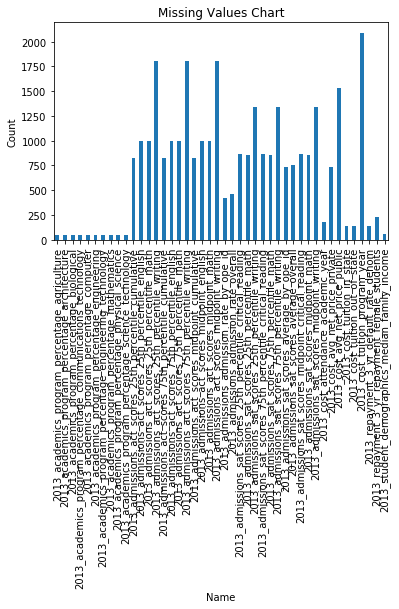

In [30]:
# Plot of missing values
import matplotlib.pyplot as plt
ax = plt.subplot(111)
null[null != 0].plot(ax=ax,kind='bar', title='Missing Values Chart')
plt.xlabel('Name')
plt.ylabel('Count')

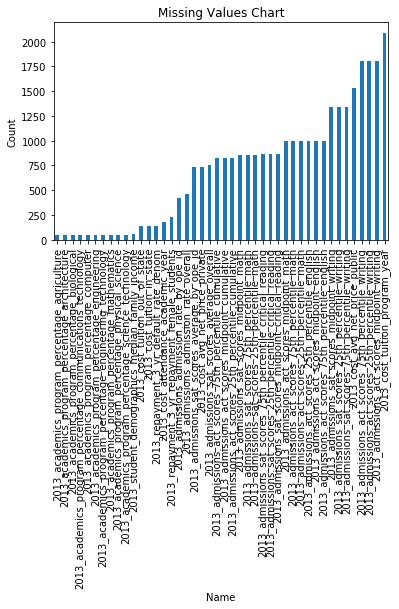

In [31]:
ax = plt.subplot(111)
null[null != 0].sort_values().plot(ax=ax,kind='bar', title='Missing Values Chart')
plt.xlabel('Name')
plt.ylabel('Count')

In [32]:
df_null=null[null != 0]

In [33]:
# Make a dataframe with missing values
x = pd.DataFrame(df_null)

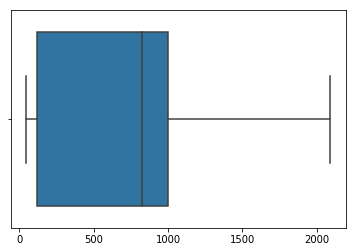

In [34]:
# Plot it
sns.boxplot([vals.dropna() for col, vals in x.iteritems()])

In [35]:
# let's drop all columns that have more than 20% of missing values

In [36]:
df2.drop(['2013_admissions_act_scores_25th_percentile_cumulative', '2013_admissions_act_scores_25th_percentile_english', '2013_admissions_act_scores_25th_percentile_math', '2013_admissions_act_scores_25th_percentile_writing', '2013_admissions_act_scores_75th_percentile_cumulative',
         '2013_admissions_act_scores_75th_percentile_english','2013_admissions_act_scores_75th_percentile_math',
         '2013_admissions_act_scores_75th_percentile_writing','2013_admissions_act_scores_midpoint_cumulative',
         '2013_admissions_act_scores_midpoint_english','2013_admissions_act_scores_midpoint_math','2013_admissions_act_scores_midpoint_writing',
         '2013_admissions_sat_scores_25th_percentile_critical_reading','2013_admissions_sat_scores_25th_percentile_math',
         '2013_admissions_sat_scores_25th_percentile_writing','2013_admissions_sat_scores_75th_percentile_critical_reading',
         '2013_admissions_sat_scores_75th_percentile_math','2013_admissions_sat_scores_75th_percentile_writing',
         '2013_admissions_sat_scores_average_by_ope_id','2013_admissions_sat_scores_average_overall',
         '2013_admissions_sat_scores_midpoint_critical_reading','2013_admissions_sat_scores_midpoint_math',
         '2013_admissions_sat_scores_midpoint_writing','2013_cost_tuition_program_year'], axis =1, inplace =True)

In [37]:
df2.columns

Index(['2013_academics_program_percentage_agriculture',
       '2013_academics_program_percentage_architecture',
       '2013_academics_program_percentage_biological',
       '2013_academics_program_percentage_communications_technology',
       '2013_academics_program_percentage_computer',
       '2013_academics_program_percentage_engineering',
       '2013_academics_program_percentage_engineering_technology',
       '2013_academics_program_percentage_mathematics',
       '2013_academics_program_percentage_physical_science',
       '2013_academics_program_percentage_science_technology',
       '2013_admissions_admission_rate_by_ope_id',
       '2013_admissions_admission_rate_overall',
       '2013_cost_attendance_academic_year', '2013_cost_avg_net_price_private',
       '2013_cost_avg_net_price_public', '2013_cost_tuition_in_state',
       '2013_cost_tuition_out_of_state',
       '2013_repayment_3_yr_default_rate_denom',
       '2013_repayment_3_yr_repayment_female_students',
       '2

In [38]:
df2.head()

,2013_academics_program_percentage_agriculture,2013_academics_program_percentage_architecture,2013_academics_program_percentage_biological,2013_academics_program_percentage_communications_technology,2013_academics_program_percentage_computer,2013_academics_program_percentage_engineering,2013_academics_program_percentage_engineering_technology,2013_academics_program_percentage_mathematics,2013_academics_program_percentage_physical_science,2013_academics_program_percentage_science_technology,...,2013_cost_tuition_in_state,2013_cost_tuition_out_of_state,2013_repayment_3_yr_default_rate_denom,2013_repayment_3_yr_repayment_female_students,2013_student_demographics_median_family_income,id,school_city,school_name,school_ownership,school_state
0,0.0541,0.0152,0.0899,0.000,0.0144,0.0627,0.0000,0.0136,0.0134,0.0,...,13443.0,28159.0,5052.0,3718.0,73594.0,166629,Amherst,University of Massachusetts-Amherst,1,MA
1,0.0000,0.0045,0.0257,0.009,0.0093,0.0026,0.0325,0.0061,0.0119,0.0,...,9364.0,24909.0,5626.0,4543.0,34852.0,169798,Ypsilanti,Eastern Michigan University,1,MI
2,0.0000,0.0000,0.0304,0.000,0.1335,0.1325,0.0168,0.0172,0.0159,0.0,...,12097.0,26146.0,2509.0,1465.0,51843.0,166513,Lowell,University of Massachusetts-Lowell,1,MA
3,0.0000,0.0000,0.0441,0.000,0.0181,0.0954,0.0000,0.0032,0.0126,0.0,...,11681.0,24156.0,2151.0,1639.0,53000.0,167987,North Dartmouth,University of Massachusetts-Dartmouth,1,MA
4,0.0000,0.0000,0.0431,0.000,0.0098,0.0000,0.0000,0.0020,0.0000,0.0,...,32560.0,32560.0,1876.0,1368.0,40385.0,167899,Springfield,Springfield College,2,MA


In [39]:
# replace nan with 0
df2=df2.fillna(0)

In [40]:
null = df2.isnull().sum()
# Get all the missing values
null[null != 0]

# Percentage of all missing values
null[null != 0]/df2.shape[0]

Series([], dtype: float64)

In [41]:
df2.head()

,2013_academics_program_percentage_agriculture,2013_academics_program_percentage_architecture,2013_academics_program_percentage_biological,2013_academics_program_percentage_communications_technology,2013_academics_program_percentage_computer,2013_academics_program_percentage_engineering,2013_academics_program_percentage_engineering_technology,2013_academics_program_percentage_mathematics,2013_academics_program_percentage_physical_science,2013_academics_program_percentage_science_technology,...,2013_cost_tuition_in_state,2013_cost_tuition_out_of_state,2013_repayment_3_yr_default_rate_denom,2013_repayment_3_yr_repayment_female_students,2013_student_demographics_median_family_income,id,school_city,school_name,school_ownership,school_state
0,0.0541,0.0152,0.0899,0.000,0.0144,0.0627,0.0000,0.0136,0.0134,0.0,...,13443.0,28159.0,5052.0,3718.0,73594.0,166629,Amherst,University of Massachusetts-Amherst,1,MA
1,0.0000,0.0045,0.0257,0.009,0.0093,0.0026,0.0325,0.0061,0.0119,0.0,...,9364.0,24909.0,5626.0,4543.0,34852.0,169798,Ypsilanti,Eastern Michigan University,1,MI
2,0.0000,0.0000,0.0304,0.000,0.1335,0.1325,0.0168,0.0172,0.0159,0.0,...,12097.0,26146.0,2509.0,1465.0,51843.0,166513,Lowell,University of Massachusetts-Lowell,1,MA
3,0.0000,0.0000,0.0441,0.000,0.0181,0.0954,0.0000,0.0032,0.0126,0.0,...,11681.0,24156.0,2151.0,1639.0,53000.0,167987,North Dartmouth,University of Massachusetts-Dartmouth,1,MA
4,0.0000,0.0000,0.0431,0.000,0.0098,0.0000,0.0000,0.0020,0.0000,0.0,...,32560.0,32560.0,1876.0,1368.0,40385.0,167899,Springfield,Springfield College,2,MA


In [42]:
df2.columns

Index(['2013_academics_program_percentage_agriculture',
       '2013_academics_program_percentage_architecture',
       '2013_academics_program_percentage_biological',
       '2013_academics_program_percentage_communications_technology',
       '2013_academics_program_percentage_computer',
       '2013_academics_program_percentage_engineering',
       '2013_academics_program_percentage_engineering_technology',
       '2013_academics_program_percentage_mathematics',
       '2013_academics_program_percentage_physical_science',
       '2013_academics_program_percentage_science_technology',
       '2013_admissions_admission_rate_by_ope_id',
       '2013_admissions_admission_rate_overall',
       '2013_cost_attendance_academic_year', '2013_cost_avg_net_price_private',
       '2013_cost_avg_net_price_public', '2013_cost_tuition_in_state',
       '2013_cost_tuition_out_of_state',
       '2013_repayment_3_yr_default_rate_denom',
       '2013_repayment_3_yr_repayment_female_students',
       '2

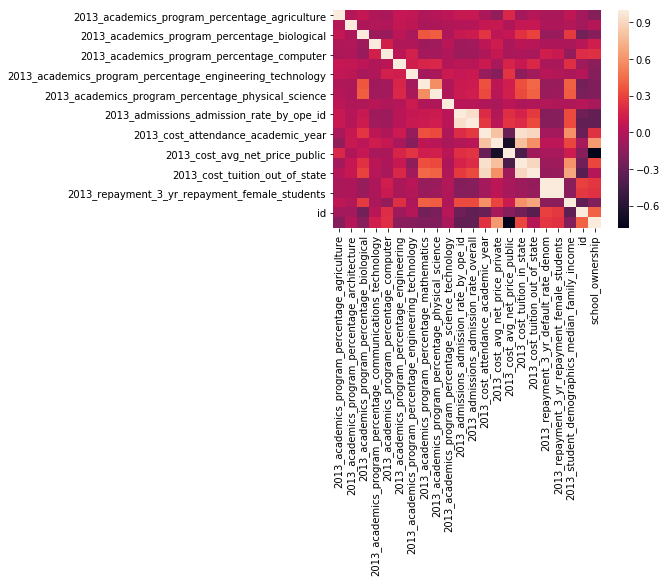

In [43]:
# use heatmap to check the correlation
sns.heatmap(df2.corr())

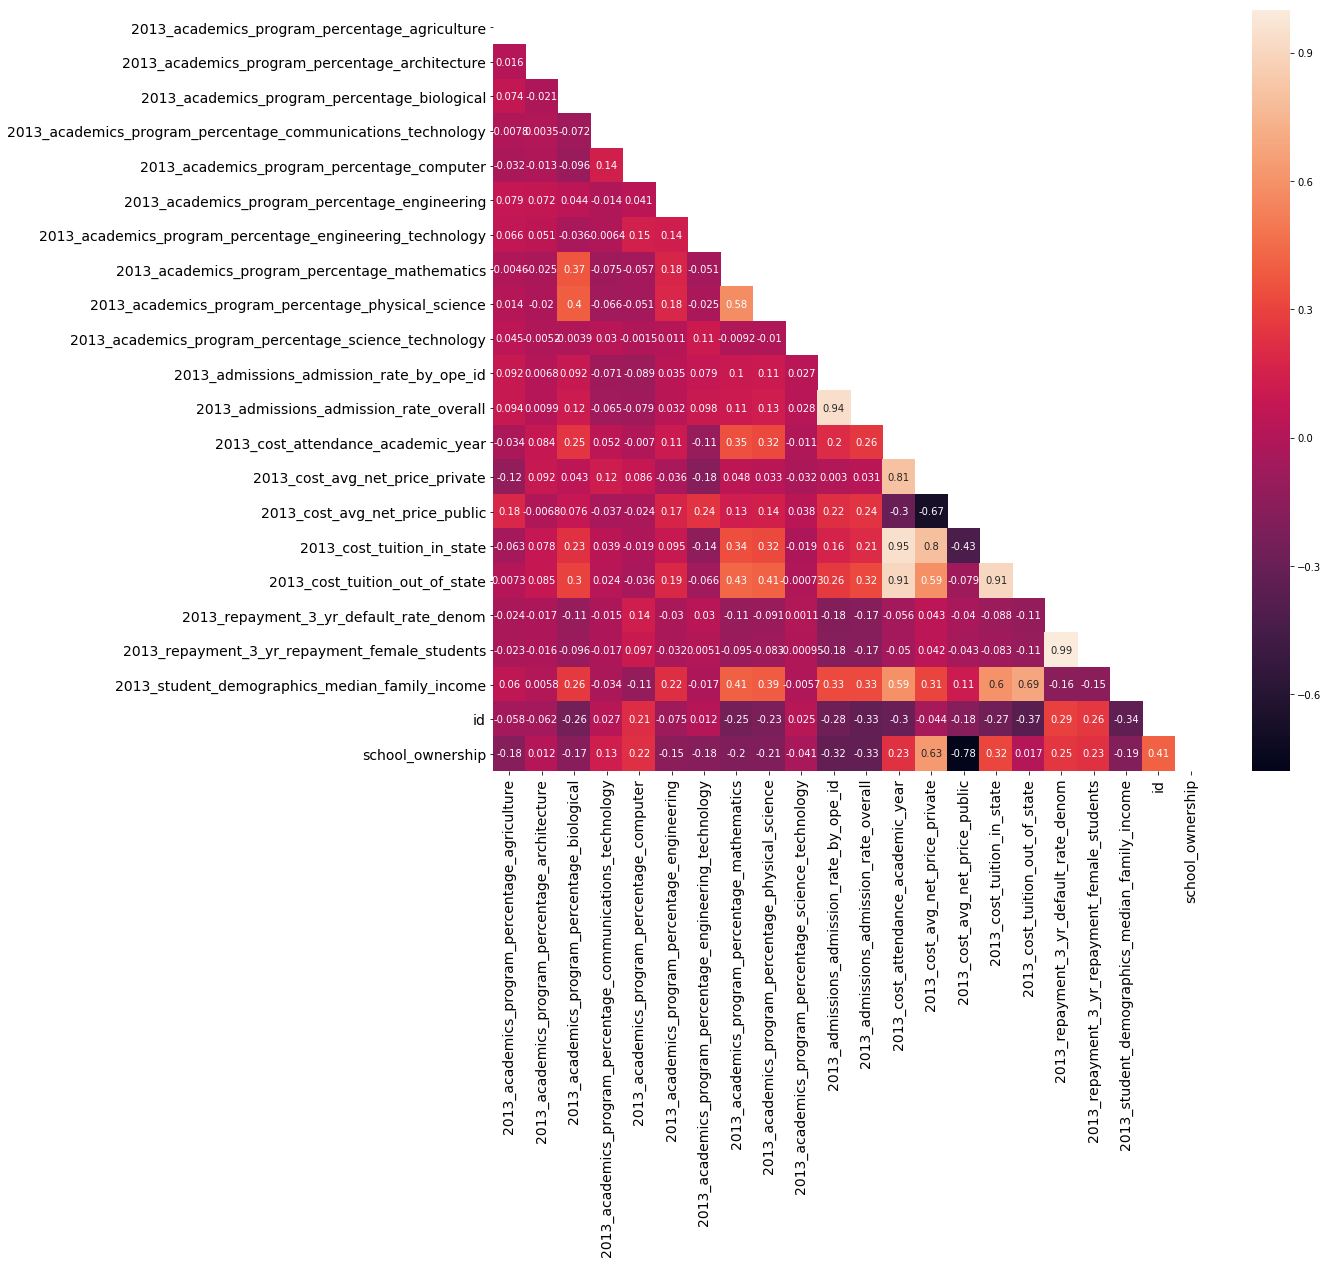

In [44]:
corr = df2.corr()

fig, ax = plt.subplots(figsize=(16,14))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.show()

In [45]:
# df2=pd.get_dummies(df2, columns=['school_city'], drop_first=True)

# df2=pd.get_dummies(df2, columns=['school_name'], drop_first=True)

# df2=pd.get_dummies(df2, columns=['school_state'], drop_first=True)

In [46]:
df3= df2.copy()

In [47]:
df3.drop(['school_city','school_name','school_state'], axis =1, inplace =True)

In [48]:
# Rename some column names for easy use
df3.rename(columns={'2013_cost_attendance_academic_year': 'yearly_cost','2013_cost_tuition_out_of_state':'cost_tuition_out_of_state','2013_cost_tuition_in_state':'cost_tuition_in_state'}, inplace=True)

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 8
Data columns (total 22 columns):
2013_academics_program_percentage_agriculture                  2093 non-null float64
2013_academics_program_percentage_architecture                 2093 non-null float64
2013_academics_program_percentage_biological                   2093 non-null float64
2013_academics_program_percentage_communications_technology    2093 non-null float64
2013_academics_program_percentage_computer                     2093 non-null float64
2013_academics_program_percentage_engineering                  2093 non-null float64
2013_academics_program_percentage_engineering_technology       2093 non-null float64
2013_academics_program_percentage_mathematics                  2093 non-null float64
2013_academics_program_percentage_physical_science             2093 non-null float64
2013_academics_program_percentage_science_technology           2093 non-null float64
2013_admissions_admission_rate_by_ope_id      

In [50]:
# Use SelectKBest for features selection
selectk_reg = SelectKBest(score_func=f_regression, k=20)

X = df3[[col for col in df3.columns if col != 'yearly_cost']].copy()
y = df3['yearly_cost'].copy()

In [51]:
selectk_reg.fit(X, y)

SelectKBest(k=20, score_func=<function f_regression at 0x10d0371e0>)

In [52]:
selected_features = X.iloc[:, selectk_reg.get_support()]
selected_features.head()

,2013_academics_program_percentage_agriculture,2013_academics_program_percentage_architecture,2013_academics_program_percentage_biological,2013_academics_program_percentage_communications_technology,2013_academics_program_percentage_engineering,2013_academics_program_percentage_engineering_technology,2013_academics_program_percentage_mathematics,2013_academics_program_percentage_physical_science,2013_academics_program_percentage_science_technology,2013_admissions_admission_rate_by_ope_id,2013_admissions_admission_rate_overall,2013_cost_avg_net_price_private,2013_cost_avg_net_price_public,cost_tuition_in_state,cost_tuition_out_of_state,2013_repayment_3_yr_default_rate_denom,2013_repayment_3_yr_repayment_female_students,2013_student_demographics_median_family_income,id,school_ownership
0,0.0541,0.0152,0.0899,0.000,0.0627,0.0000,0.0136,0.0134,0.0,0.6294,0.6294,0.0,19087.0,13443.0,28159.0,5052.0,3718.0,73594.0,166629,1
1,0.0000,0.0045,0.0257,0.009,0.0026,0.0325,0.0061,0.0119,0.0,0.6398,0.6398,0.0,12449.0,9364.0,24909.0,5626.0,4543.0,34852.0,169798,1
2,0.0000,0.0000,0.0304,0.000,0.1325,0.0168,0.0172,0.0159,0.0,0.6397,0.6397,0.0,16351.0,12097.0,26146.0,2509.0,1465.0,51843.0,166513,1
3,0.0000,0.0000,0.0441,0.000,0.0954,0.0000,0.0032,0.0126,0.0,0.7213,0.7213,0.0,17092.0,11681.0,24156.0,2151.0,1639.0,53000.0,167987,1
4,0.0000,0.0000,0.0431,0.000,0.0000,0.0000,0.0020,0.0000,0.0,0.6992,0.6992,27674.0,0.0,32560.0,32560.0,1876.0,1368.0,40385.0,167899,2


In [53]:
lr = LinearRegression()
ss = StandardScaler()
ss.fit(X)
standard_X = ss.transform(X)

std_selectk_reg = SelectKBest(score_func=f_regression, k=20)
std_selectk_reg.fit(standard_X, y)

std_selected_features = X.iloc[:, std_selectk_reg.get_support()]
print('Selected Features:', std_selected_features.columns)

ss_xs = StandardScaler()
ss_xs.fit(std_selected_features)
std_selected_features = ss_xs.transform(std_selected_features)

print('All features, standardized')
scores = cross_val_score(lr, standard_X, y)
print(scores, '\n', 'Mean: ', scores.mean(),'\n')

print('Feature Selection via SelectKBest, standardized')
scores = cross_val_score(lr, std_selected_features, y)
print(scores, '\n', 'Mean: ', scores.mean())

Selected Features: Index(['2013_academics_program_percentage_agriculture',
       '2013_academics_program_percentage_architecture',
       '2013_academics_program_percentage_biological',
       '2013_academics_program_percentage_communications_technology',
       '2013_academics_program_percentage_engineering',
       '2013_academics_program_percentage_engineering_technology',
       '2013_academics_program_percentage_mathematics',
       '2013_academics_program_percentage_physical_science',
       '2013_academics_program_percentage_science_technology',
       '2013_admissions_admission_rate_by_ope_id',
       '2013_admissions_admission_rate_overall',
       '2013_cost_avg_net_price_private', '2013_cost_avg_net_price_public',
       'cost_tuition_in_state', 'cost_tuition_out_of_state',
       '2013_repayment_3_yr_default_rate_denom',
       '2013_repayment_3_yr_repayment_female_students',
       '2013_student_demographics_median_family_income', 'id',
       'school_ownership'],
      d

### Build a model with pymc3 to estimate the difference in tuition between Private and Private schools.

In [54]:
# 1	Public
# 2	Private nonprofit
# 3	Private for-profit

In [55]:
def school_classifier(cell):
    if cell == 1:
        return 'Public'
    elif cell == 2:
        return 'Private nonprofit'
    else:
        return 'Private for profit'
    

In [56]:
df3['school_type']=df3['school_ownership'].apply(school_classifier)

In [57]:
df3.head()

,2013_academics_program_percentage_agriculture,2013_academics_program_percentage_architecture,2013_academics_program_percentage_biological,2013_academics_program_percentage_communications_technology,2013_academics_program_percentage_computer,2013_academics_program_percentage_engineering,2013_academics_program_percentage_engineering_technology,2013_academics_program_percentage_mathematics,2013_academics_program_percentage_physical_science,2013_academics_program_percentage_science_technology,...,2013_cost_avg_net_price_private,2013_cost_avg_net_price_public,cost_tuition_in_state,cost_tuition_out_of_state,2013_repayment_3_yr_default_rate_denom,2013_repayment_3_yr_repayment_female_students,2013_student_demographics_median_family_income,id,school_ownership,school_type
0,0.0541,0.0152,0.0899,0.000,0.0144,0.0627,0.0000,0.0136,0.0134,0.0,...,0.0,19087.0,13443.0,28159.0,5052.0,3718.0,73594.0,166629,1,Public
1,0.0000,0.0045,0.0257,0.009,0.0093,0.0026,0.0325,0.0061,0.0119,0.0,...,0.0,12449.0,9364.0,24909.0,5626.0,4543.0,34852.0,169798,1,Public
2,0.0000,0.0000,0.0304,0.000,0.1335,0.1325,0.0168,0.0172,0.0159,0.0,...,0.0,16351.0,12097.0,26146.0,2509.0,1465.0,51843.0,166513,1,Public
3,0.0000,0.0000,0.0441,0.000,0.0181,0.0954,0.0000,0.0032,0.0126,0.0,...,0.0,17092.0,11681.0,24156.0,2151.0,1639.0,53000.0,167987,1,Public
4,0.0000,0.0000,0.0431,0.000,0.0098,0.0000,0.0000,0.0020,0.0000,0.0,...,27674.0,0.0,32560.0,32560.0,1876.0,1368.0,40385.0,167899,2,Private nonprofit


In [58]:
df3.school_type.value_counts()

Private nonprofit     1245
Public                 591
Private for profit     257
Name: school_type, dtype: int64

In [59]:
Public_school_cost= df3.loc[df3['school_ownership']==1,'yearly_cost'].values
Private_school_cost = df3.loc[df3['school_ownership']==2,'yearly_cost'].values

print(Public_school_cost.mean(),Private_school_cost.mean() )


18426.8104907 33848.3172691


In [60]:
df3.yearly_cost.mean()

28168.317247969422

In [61]:
import pymc3 as pm

In [62]:
prior_mean = df3.yearly_cost.mean()
prior_std = df3.yearly_cost.std()
print(prior_mean, prior_std)

28168.317247969422 14916.285784819598


In [63]:
with pm.Model() as model:
    
    public_mean = pm.Normal('public_mean', prior_mean, sd=prior_std)
    private_mean = pm.Normal('private_mean', prior_mean, sd=prior_std)
    
    public_std = pm.Gamma('public_std', mu=prior_std, sd=prior_std)
    private_std = pm.Gamma('private_std', mu=prior_std, sd=prior_std)
    
    public_cost = pm.Normal('public_cost', mu=public_mean, sd=public_std, observed=Public_school_cost)
    private_cost = pm.Normal('private_cost', mu=private_mean, sd=private_std, observed=Private_school_cost)
    
    mean_delta = pm.Deterministic('mean_delta', public_mean - private_mean)
    std_delta = pm.Deterministic('std_delta', public_std - private_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / np.sqrt((public_std**2 + private_std**2)/2.))
    

In [64]:
with model:
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(50000, start=start, step=step, njobs=2)

logp = -20,317, ||grad|| = 383.97: 100%|██████████| 9/9 [00:00<00:00, 374.09it/s]
100%|██████████| 50500/50500 [01:26<00:00, 580.78it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c26cf9d30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1c27c71be0>], dtype=object)

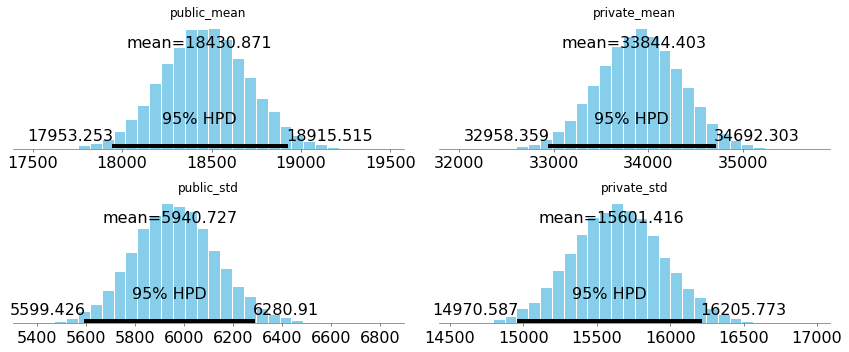

In [65]:
pm.plot_posterior(trace[5000::3],
                  varnames=['public_mean', 'private_mean',
                            'public_std', 'private_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c26daa2b0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1c2705b9b0>], dtype=object)

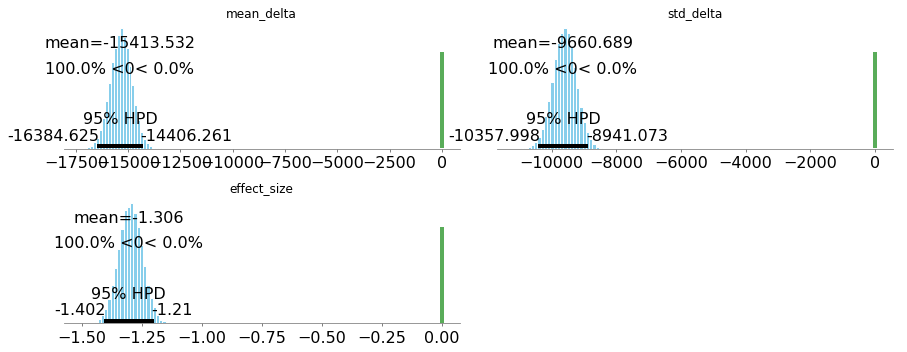

In [66]:
pm.plot_posterior(trace[5000::3],
                  varnames=['mean_delta','std_delta','effect_size'],
                  color='#87ceeb', ref_val=0)

The HPD is the Highest Posterior Density interval. This gives us a Bayesian "credible interval" which is the corollary to the Frequentist confidence interval. The 95% HPD says that the 95% highest density points on the distribution fall within that range.

Since 0 falls outside the 95% HPD, we can say that public and private yearly tuition are different

**The `pm.summary` function can also display a text representation of this information:**

In [67]:
pm.summary(trace[5000:],varnames=['mean_delta', 'std_delta','effect_size'])


mean_delta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -15412.392       505.176          1.400            [-16386.918, -14401.197]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -16407.297     -15754.453     -15413.172     -15070.993     -14417.449


std_delta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -9663.669        358.858          1.004            [-10368.643, -8958.421]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -10376.647     -9903.894      -9660.572      -9420.629      -8964.641


effect_size:

  Mean             SD               MC Error         9

### Build a model with pymc3 to estimate the difference in tuition between Private nonprofit and Private for profit schools.

In [68]:
Private_nonprofit_school_cost= df3.loc[df3['school_ownership']==2,'yearly_cost'].values
Private_forprofit_school_cost = df3.loc[df3['school_ownership']==3,'yearly_cost'].values

print(Private_nonprofit_school_cost.mean(),Private_forprofit_school_cost.mean() )

33848.3172691 23054.0389105


In [69]:
prior_mean = df3.yearly_cost.mean()
prior_std = df3.yearly_cost.std()
print(prior_mean, prior_std)

28168.317247969422 14916.285784819598


In [70]:
with pm.Model() as model:
    
    private_nonprofit_mean = pm.Normal('private_nonprofit_mean', prior_mean, sd=prior_std)
    private_forprofit_mean = pm.Normal('private_forprofit_mean', prior_mean, sd=prior_std)
    
    private_nonprofit_std = pm.Gamma('private_nonprofit_std', mu=prior_std, sd=prior_std)
    private_forprofit_std = pm.Gamma('private_forprofit_std', mu=prior_std, sd=prior_std)
    
    private_nonprofit_cost = pm.Normal('private_nonprofit_cost', mu=private_nonprofit_mean, sd=private_nonprofit_std, observed=Private_nonprofit_school_cost)
    private_forprofit_cost = pm.Normal('private_forprofit_cost', mu=private_forprofit_mean, sd=private_forprofit_std, observed=Private_forprofit_school_cost)
    
    mean_delta = pm.Deterministic('mean_delta',  private_nonprofit_mean - private_forprofit_mean)
    std_delta = pm.Deterministic('std_delta',  private_nonprofit_std - private_forprofit_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / np.sqrt((private_nonprofit_std**2 + private_forprofit_std**2)/2.))

In [71]:
with model:
    step = pm.NUTS()
    start = pm.find_MAP()
    trace = pm.sample(50000, start=start, step=step, njobs=2)

logp = -16,730, ||grad|| = 298.67: 100%|██████████| 10/10 [00:00<00:00, 719.26it/s]
100%|██████████| 50500/50500 [01:19<00:00, 632.82it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c249d5e48>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1c25bbacf8>], dtype=object)

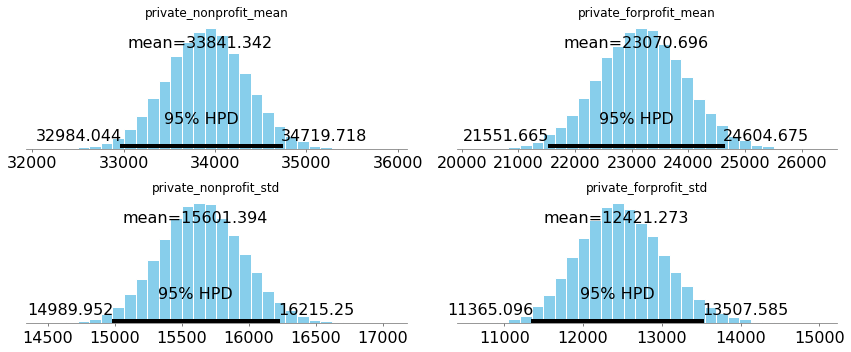

In [72]:
pm.plot_posterior(trace[5000::3],
                  varnames=['private_nonprofit_mean', 'private_forprofit_mean',
                            'private_nonprofit_std', 'private_forprofit_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c25cb77f0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1c262170f0>], dtype=object)

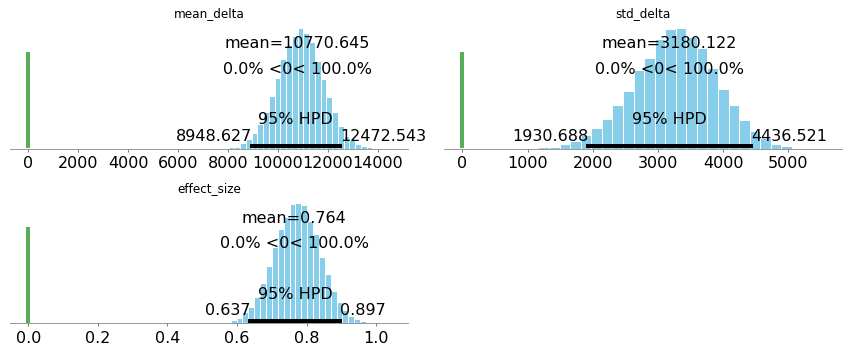

In [73]:
pm.plot_posterior(trace[5000::3],
                  varnames=['mean_delta','std_delta','effect_size'],
                  color='#87ceeb', ref_val=0)

The HPD is the Highest Posterior Density interval. This gives us a Bayesian "credible interval" which is the corollary to the Frequentist confidence interval. The 95% HPD says that the 95% highest density points on the distribution fall within that range.

Since 0 falls outside the 95% HPD, we can say that public and private yearly tuition are different

In [74]:
pm.summary(trace[5000:],varnames=['mean_delta', 'std_delta','effect_size'])


mean_delta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  10775.544        897.466          2.329            [9014.982, 12538.518]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  9011.682       10167.470      10779.024      11379.067      12536.571


std_delta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  3184.563         632.958          1.587            [1943.304, 4432.938]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1901.338       2765.763       3198.744       3617.199       4393.359


effect_size:

  Mean             SD               MC Error         95% HPD i

### Multiclass Classification using  Neural Network --`keras`.

In [75]:
%ls

Project 4 First_draft.ipynb
Project 4 using Api, Pymc3, and Keras.ipynb
README.md
Submission.ipynb
df2.csv
df3.csv
project4.csv
reddit_posts.csv


In [76]:
import pandas as pd

In [77]:
df3= pd.read_csv('df3.csv')

In [78]:
df3.head()

,2013_academics_program_percentage_agriculture,2013_academics_program_percentage_architecture,2013_academics_program_percentage_biological,2013_academics_program_percentage_communications_technology,2013_academics_program_percentage_computer,2013_academics_program_percentage_engineering,2013_academics_program_percentage_engineering_technology,2013_academics_program_percentage_mathematics,2013_academics_program_percentage_physical_science,2013_academics_program_percentage_science_technology,...,2013_cost_avg_net_price_private,2013_cost_avg_net_price_public,cost_tuition_in_state,cost_tuition_out_of_state,2013_repayment_3_yr_default_rate_denom,2013_repayment_3_yr_repayment_female_students,2013_student_demographics_median_family_income,id,school_ownership,school_type
0,0.0541,0.0152,0.0899,0.000,0.0144,0.0627,0.0000,0.0136,0.0134,0.0,...,0.0,19087.0,13443.0,28159.0,5052.0,3718.0,73594.0,166629,1,Public
1,0.0000,0.0045,0.0257,0.009,0.0093,0.0026,0.0325,0.0061,0.0119,0.0,...,0.0,12449.0,9364.0,24909.0,5626.0,4543.0,34852.0,169798,1,Public
2,0.0000,0.0000,0.0304,0.000,0.1335,0.1325,0.0168,0.0172,0.0159,0.0,...,0.0,16351.0,12097.0,26146.0,2509.0,1465.0,51843.0,166513,1,Public
3,0.0000,0.0000,0.0441,0.000,0.0181,0.0954,0.0000,0.0032,0.0126,0.0,...,0.0,17092.0,11681.0,24156.0,2151.0,1639.0,53000.0,167987,1,Public
4,0.0000,0.0000,0.0431,0.000,0.0098,0.0000,0.0000,0.0020,0.0000,0.0,...,27674.0,0.0,32560.0,32560.0,1876.0,1368.0,40385.0,167899,2,Private nonprofit


In [79]:
y = df3['school_ownership'].values
X = df3[['2013_academics_program_percentage_agriculture',
       '2013_academics_program_percentage_architecture',
       '2013_academics_program_percentage_biological',
       '2013_academics_program_percentage_communications_technology',
       '2013_academics_program_percentage_engineering',
       '2013_academics_program_percentage_engineering_technology',
       '2013_academics_program_percentage_mathematics',
       '2013_academics_program_percentage_physical_science',
       '2013_academics_program_percentage_science_technology',
       '2013_admissions_admission_rate_by_ope_id',
       '2013_admissions_admission_rate_overall',
       '2013_cost_avg_net_price_private','2013_cost_avg_net_price_public',
       'cost_tuition_in_state', 'cost_tuition_out_of_state',
       '2013_repayment_3_yr_default_rate_denom',
       '2013_repayment_3_yr_repayment_female_students',
       '2013_student_demographics_median_family_income']].values

In [80]:
# the baseline -- frequency of the class that appears the most--59.48%
df3.school_ownership.value_counts()/len(df3)

2    0.59484
1    0.28237
3    0.12279
Name: school_ownership, dtype: float64

### Keras Classification Model

In [81]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X,y)
y_test_confusion_matrix = y_test.copy()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = X_train / 255.
X_test = X_test / 255.

ss = StandardScaler()


ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

#Add Droupout to avoid overfitting
model = Sequential()
model.add(Dropout(.5, input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(17, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=70)

Train on 1569 samples, validate on 524 samples
Epoch 1/20
1569/1569 [==============================] - 1s 371us/step - loss: 2.1164 - acc: 0.1593 - val_loss: 1.4663 - val_acc: 0.2271
Epoch 2/20
1569/1569 [==============================] - 0s 50us/step - loss: 1.6593 - acc: 0.2473 - val_loss: 1.2257 - val_acc: 0.4905
Epoch 3/20
1569/1569 [==============================] - 0s 53us/step - loss: 1.3024 - acc: 0.4251 - val_loss: 1.0645 - val_acc: 0.6927
Epoch 4/20
1569/1569 [==============================] - 0s 40us/step - loss: 1.0804 - acc: 0.5743 - val_loss: 0.9337 - val_acc: 0.7347
Epoch 5/20
1569/1569 [==============================] - 0s 45us/step - loss: 0.9660 - acc: 0.6431 - val_loss: 0.8305 - val_acc: 0.7347
Epoch 6/20
1569/1569 [==============================] - 0s 47us/step - loss: 0.8724 - acc: 0.6858 - val_loss: 0.7472 - val_acc: 0.7653
Epoch 7/20
1569/1569 [==============================] - 0s 39us/step - loss: 0.8425 - acc: 0.6820 - val_loss: 0.6784 - val_acc: 0.8053
Epoch 8

In [82]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                380       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 17)                357       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 72        
Total params: 809
Trainable params: 809
Non-trainable params: 0
_________________________________________________________________


### Confusion Matrix to check the performance of my model

In [84]:
preds = model.predict_classes(X_test)

confusion_matrix(y_test_confusion_matrix,preds)


array([[139,   8,   0],
       [  1, 310,   0],
       [  0,  34,  32]])

In [85]:
print(classification_report(y_test_confusion_matrix,preds))

             precision    recall  f1-score   support

          1       0.99      0.95      0.97       147
          2       0.88      1.00      0.94       311
          3       1.00      0.48      0.65        66

avg / total       0.93      0.92      0.91       524



In [87]:
result = pd.DataFrame()

In [88]:
result['Predictions'] = preds
result['True Value'] =y_test_confusion_matrix

In [89]:
result['residual'] = result['True Value'] - result['Predictions']

In [90]:
result.to_csv('project4.csv', index=False)